In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 2s 0us/step


In [3]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [63]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='MSE', metrics=['accuracy'])



In [64]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [69]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=256,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.0120 - accuracy: 0.9871 - val_loss: 0.1065 - val_accuracy: 0.8740
Epoch 2/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.0105 - accuracy: 0.9888 - val_loss: 0.1098 - val_accuracy: 0.8702
Epoch 3/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.0079 - accuracy: 0.9918 - val_loss: 0.1123 - val_accuracy: 0.8702
Epoch 4/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.0081 - accuracy: 0.9913 - val_loss: 0.1152 - val_accuracy: 0.8695
Epoch 5/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.0063 - accuracy: 0.9935 - val_loss: 0.1154 - val_accuracy: 0.8702
Epoch 6/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.0060 - accuracy: 0.9937 - val_loss: 0.1191 - val_accuracy: 0.8672
Epoch 7/20
15000/15000 [==============================] - 1s 75us/st

In [70]:
results

[0.1350735271848738, 0.8547999858856201]

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

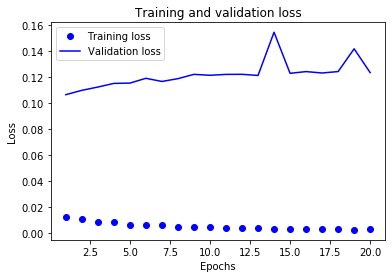

In [71]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(val_loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


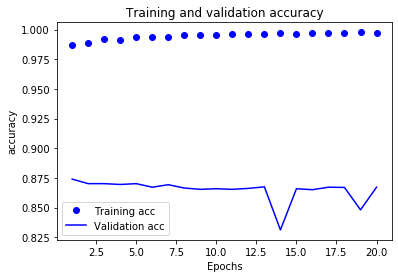

In [72]:
plt.clf()
#Clears the figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [37]:
model.predict(x_test)

array([[9.5662748e-04],
       [1.0000000e+00],
       [9.9965763e-01],
       ...,
       [3.0908445e-04],
       [5.6794137e-03],
       [5.3515965e-01]], dtype=float32)

# Reuters exemplo
# Classificar noticías em um ou mais tópicos

In [74]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


In [75]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [78]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[11]])


In [79]:
decoded_newswire

'? lt international thomson organisation ltd said it will report financial results in u s funds rather than sterling beginning from jan 1 1987 it said the change will not be applied retroactively to prior financial periods the company said as a result of recent investments most of its assets now are located in the united states reuter 3'

In [80]:
train_labels[10]

3

In [113]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [114]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [115]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [112]:
#one_hot_train_labels = to_one_hot(train_labels)
#one_hot_test_labels = to_one_hot(test_labels)

In [116]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [121]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

The last layer uses a softmax activation. You saw this pattern in the MNIST
example. It means the network will output a probability distribution over the 46
different output classes—for every input sample, the network will produce a 46-
dimensional output vector, where output[i] is the probability that the sample
belongs to class i . The 46 scores will sum to 1.

In [123]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

#y_val = y_train[:1000]
#partial_y_train = y_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [127]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.0776 - accuracy: 0.9622 - val_loss: 2.3617 - val_accuracy: 0.7930
Epoch 2/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.0707 - accuracy: 0.9604 - val_loss: 2.4179 - val_accuracy: 0.7920
Epoch 3/20
7982/7982 [==============================] - 0s 61us/step - loss: 0.0703 - accuracy: 0.9607 - val_loss: 2.4573 - val_accuracy: 0.7870
Epoch 4/20
7982/7982 [==============================] - 0s 60us/step - loss: 0.0689 - accuracy: 0.9622 - val_loss: 2.5605 - val_accuracy: 0.7850
Epoch 5/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.0696 - accuracy: 0.9592 - val_loss: 2.5436 - val_accuracy: 0.7920
Epoch 6/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.0679 - accuracy: 0.9594 - val_loss: 2.5453 - val_accuracy: 0.7860
Epoch 7/20
7982/7982 [==============================] - 0s 60us/step - loss: 0.067

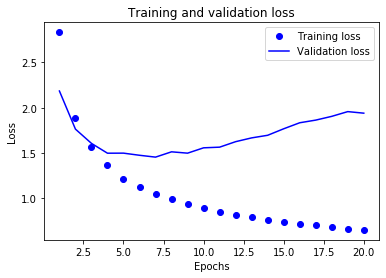

In [141]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

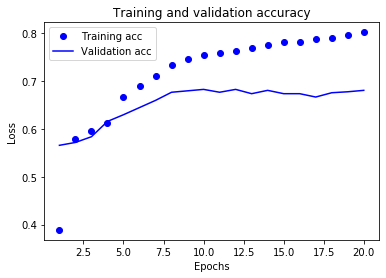

In [142]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [131]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1918967052537845

In [132]:
predictions = model.predict(x_test)

In [133]:
np.sum(predictions[0])

1.0000001

In [134]:
np.argmax(predictions[0])


3

In [135]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [136]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])

In [143]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 105us/step - loss: 3.1434 - accuracy: 0.2260 - val_loss: 2.3889 - val_accuracy: 0.5810
Epoch 2/20
7982/7982 [==============================] - 1s 89us/step - loss: 1.8174 - accuracy: 0.6193 - val_loss: 1.5885 - val_accuracy: 0.6320
Epoch 3/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.3720 - accuracy: 0.6789 - val_loss: 1.4424 - val_accuracy: 0.6670
Epoch 4/20
7982/7982 [==============================] - 1s 89us/step - loss: 1.1911 - accuracy: 0.7087 - val_loss: 1.3743 - val_accuracy: 0.6800
Epoch 5/20
7982/7982 [==============================] - 1s 88us/step - loss: 1.0777 - accuracy: 0.7217 - val_loss: 1.3587 - val_accuracy: 0.6800
Epoch 6/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.9928 - accuracy: 0.7300 - val_loss: 1.3436 - val_accuracy: 0.6830
Epoch 7/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.91

ValueError: Error when checking target: expected dense_55 to have shape (46,) but got array with shape (1,)

In [144]:
results = model.evaluate(x_test, y_test)

ValueError: Error when checking target: expected dense_55 to have shape (46,) but got array with shape (1,)

# Exemplo de Regressão

In [145]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 5us/step


In [147]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [148]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

# Normalizando dados

In [149]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [151]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
        input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [153]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [154]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate( [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [155]:
all_scores
np.mean(all_scores)

2.346970498561859